In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

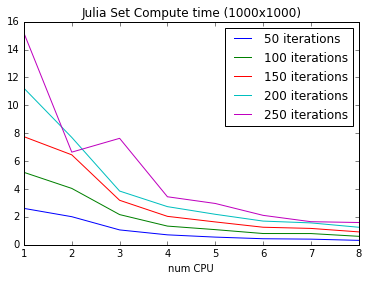

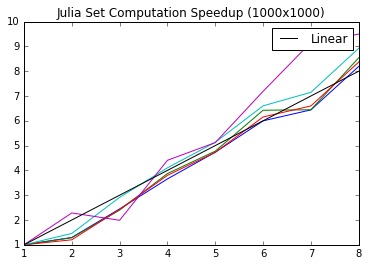

In [23]:
x_vals = np.array( range(1,9) )
for key in [50,100,150,200,250]:
    vals = np.loadtxt('../data/{0}_results.csv'.format(key), delimiter=',',usecols=(1,))
    plt.plot( x_vals, vals, label='{0} iterations'.format(key) )
plt.legend()
plt.xlabel('num CPU')
plt.ylabel(' Compute Time (s)')
plt.title('Julia Set Compute time (1000x1000)')
plt.savefig("raw_time.png")
plt.show()


for key in [50,100,150,200,250]:
    vals = np.loadtxt('../data/{0}_results.csv'.format(key), delimiter=',',usecols=(1,))
    vals = vals[0]/vals
    plt.plot( x_vals, vals)
plt.plot(x_vals,x_vals,label="Linear",color='black')    
plt.legend()
plt.xlabel('num CPU')
plt.ylabel(' Speedup ')
plt.title("Julia Set Computation Speedup (1000x1000)")
plt.savefig("speedup.png")
plt.show()


In [2]:
results = {}
for key in keys:
    results[ key.split('-')[0] ] = {'data':[]}

for key,val in zip(keys,vals):
    results[ key.split('-')[0] ]['data'].append( val )
    
for key in results:
    results[key]['avg'] = np.average( results[key]['data'])
    results[key]['std'] = np.std( results[key]['data'])

x_vals = np.array( sorted( [ int(key.split('_')[-1]) for key in results] ) )
y_vals = np.array( [ results['data_{0}'.format(key)]['avg'] for key in x_vals])
stds   = np.array( [ results['data_{0}'.format(key)]['std'] for key in x_vals])

plot_data = {"matrix" :{"x_vals":x_vals,'y_vals':y_vals,"stds":stds  } } 

In [3]:
vals = np.loadtxt('Looping_results.csv', delimiter=',',usecols=(1,))
keys = np.loadtxt('Looping_results.csv', delimiter=',',usecols=(0,), dtype=str)

results = {}
for key in keys:
    results[ key.split('-')[0] ] = {'data':[]}

for key,val in zip(keys,vals):
    results[ key.split('-')[0] ]['data'].append( val )
    
for key in results:
    results[key]['avg'] = np.average( results[key]['data'])
    results[key]['std'] = np.std( results[key]['data'])

x_vals = np.array( sorted( [ int(key.split('_')[-1]) for key in results] ) )
y_vals = np.array([ results['{0}'.format(key)]['avg'] for key in x_vals])
stds   = np.array( [ results['{0}'.format(key)]['std'] for key in x_vals])

plot_data["looping"] = {"x_vals":x_vals,'y_vals':y_vals,"stds":stds  }

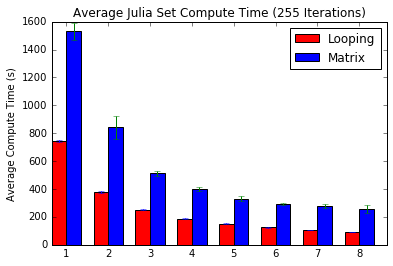

In [4]:
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(plot_data["looping"]["x_vals"], plot_data["looping"]["y_vals"], width, color='r', yerr=plot_data["looping"]["stds"])
rects2 = ax.bar(plot_data["matrix"]["x_vals"]+width, plot_data["matrix"]["y_vals"], width, color='b', yerr=plot_data["matrix"]["stds"])

ax.set_ylabel('Average Compute Time (s)')
#ax.set_title('Scores by group and gender')
ax.set_xticks(plot_data["looping"]["x_vals"] + width)
ax.set_xticklabels((x_vals))

ax.legend((rects1[0], rects2[0]), ('Looping', 'Matrix'))
ax.set_title('Average Julia Set Compute Time (255 Iterations)')

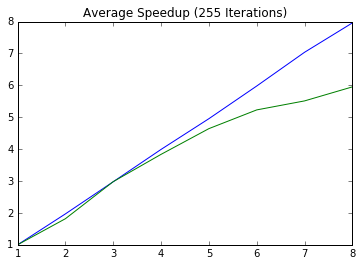

In [5]:
key = 'looping'
plot_data[key]["old_y"] = plot_data[key]["y_vals"]
plot_data[key]["y_vals"] = plot_data[key]["y_vals"][0] / plot_data[key]["y_vals"]
plot_data[key]["std"] = plot_data[key]["y_vals"]*( plot_data[key]['stds'][0]/plot_data[key]["old_y"] + plot_data[key]['stds']/plot_data[key]['old_y'][0])

plt.plot( plot_data[key]["x_vals"], plot_data[key]["y_vals"], label='Looping')

key = 'matrix'
plot_data[key]["old_y"] = plot_data[key]["y_vals"]
plot_data[key]["y_vals"] = plot_data[key]["y_vals"][0] / plot_data[key]["y_vals"]
plot_data[key]["std"] = plot_data[key]["y_vals"]*( plot_data[key]['stds'][0]/plot_data[key]["old_y"] + plot_data[key]['stds']/plot_data[key]['old_y'][0])

plt.plot( plot_data[key]["x_vals"], plot_data[key]["y_vals"], label="Matrix" )
plt.title('Average Speedup (255 Iterations)')